Dataset prepare
- Date time: date of the sale data
- store - store id
- item - item id
- sales: number of items sold at a particular store on a particular date

1. Import libraries
2. Load dataset
3. Extracting montly sales
4. Plot the montly sales / by seller?
5. Check stationarity -> ?
- Stationarity refers to the statistical properties of a time series remaining constant over time, such as constant mean, constant variance, and constant autocovariance. Use Dicky-Fuller test for this. 
6. Method:
- Deep learning based method: RNN, LSTM, BLTSM, GRU
- ARIMA, SARIMA, Prophet, Theta + statistical method 
popular: ARIMA, ETS, Prophet by Meta, LSTM
7. Generate forecasts / Future values
8. Evaluate the model
- MAE (Mean Absolute Error)
- MSE (Mean Squared Error)


# 1. Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error


In [2]:
import tensorflow as tf 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

/Users/phuongnguyen/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


# 2. Load dataset

In [3]:
olist_orders = pd.read_csv("/Users/phuongnguyen/Documents/Code Github/mlops-ml-ecommerce-customers/sample_files/olist_dataset/olist_orders_dataset.csv")

# 3. Extracting montly sales

In [4]:
# Convert order purchase timestamp to_datetime
olist_orders['purchase_datetime'] = pd.to_datetime(olist_orders['order_purchase_timestamp'])

In [5]:
#Get date only
olist_orders['purchase_date'] = olist_orders['purchase_datetime'].dt.date

In [6]:
#Get month only
olist_orders['purchase_month'] = olist_orders['purchase_datetime'].dt.strftime('%Y-%m')

In [7]:
olist_orders.head(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,purchase_datetime,purchase_date,purchase_month
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2017-10-02 10:56:33,2017-10-02,2017-10
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,2018-07-24 20:41:37,2018-07-24,2018-07
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,2018-08-08 08:38:49,2018-08-08,2018-08
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,2017-11-18 19:28:06,2017-11-18,2017-11
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,2018-02-13 21:18:39,2018-02-13,2018-02


In [8]:
#Group by month, number of orders
orders_bymonth = olist_orders.groupby('purchase_month')['order_id'].nunique().reset_index()
orders_bymonth.columns = ['month', 'no_orders']
#Sort ascending month
orders_bymonth = orders_bymonth.sort_values('month', ascending = False)
orders_bymonth

,month,no_orders
24,2018-10,4
23,2018-09,16
22,2018-08,6512
21,2018-07,6292
20,2018-06,6167
19,2018-05,6873
18,2018-04,6939
17,2018-03,7211
16,2018-02,6728
15,2018-01,7269


In [9]:
#Group by date, number of orders
orders_bydate = olist_orders.groupby('purchase_date')['order_id'].nunique().reset_index()
orders_bydate.columns = ['date', 'no_orders']
orders_bydate = orders_bydate.sort_values('date', ascending = False)
orders_bydate

,date,no_orders
633,2018-10-17,1
632,2018-10-16,1
631,2018-10-03,1
630,2018-10-01,1
629,2018-09-29,1
...,...,...
4,2016-10-02,1
3,2016-09-15,1
2,2016-09-13,1
1,2016-09-05,1


# 4. Plot the montly sales 

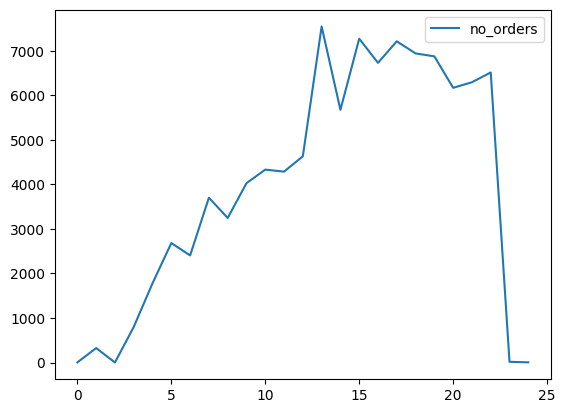

In [10]:
orders_bymonth.plot()
plt.show()

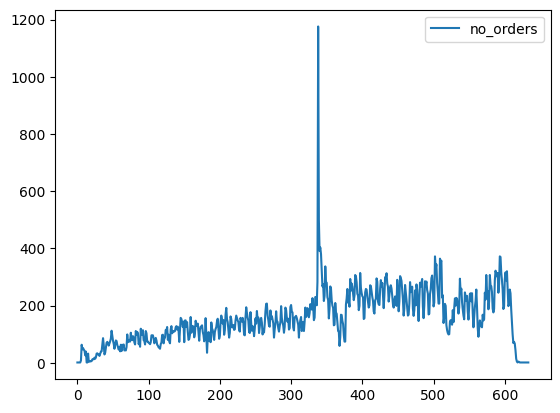

In [11]:
orders_bydate.plot()
plt.show()

In [12]:
orders_bydate_filtered = orders_bydate.loc[orders_bydate['no_orders'] < 400]

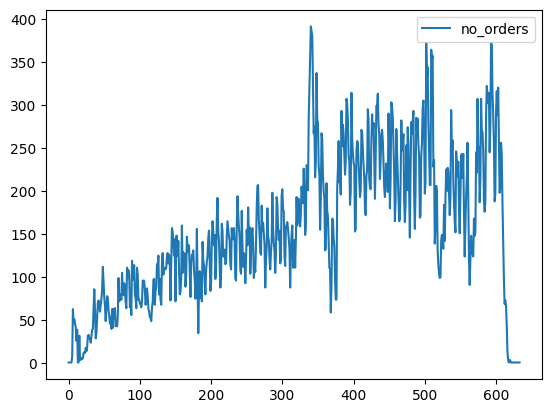

In [13]:
orders_bydate_filtered.plot()
plt.show()

# LSTM Pytorch

In [14]:
import torch 
import torch.nn as nn 
import torch.optim as optim 
import torch.utils.data as data

In [15]:
#orders_bydate_lstm = orders_bydate_filtered[["no_orders"]].values.astype('float32')

In [45]:
orders_bydate_lstm = orders_bydate_filtered.copy()
orders_bydate_lstm.set_index('date', inplace = True)

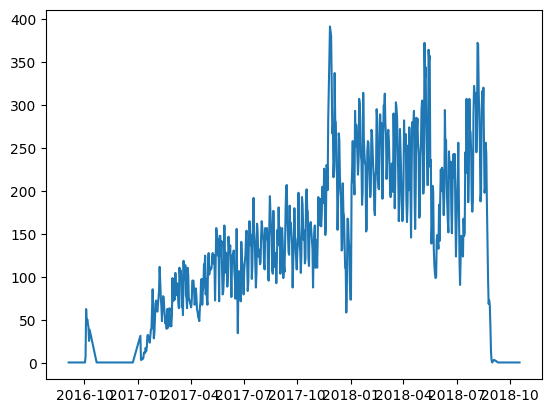

In [46]:
plt.plot(orders_bydate_lstm)
plt.show()

In [47]:
# train-test split for time series
train_size = int(len(orders_bydate_lstm) * 0.67)
test_size = len(orders_bydate_lstm) - train_size
train, test = orders_bydate_lstm[:train_size], orders_bydate_lstm[train_size:]

In [48]:
print(train_size, test_size)

422 209


In [49]:
# Function create dataset
def create_dataset(dataset, lookback):
    X, y = [], [] 
    for i in range(len(dataset)-lookback):
        feature = dataset[i : i+lookback]
        target = dataset[i+1: i+lookback+1]
        X.append(feature)
        y.append(target)
    return torch.tensor(X), torch.tensor(y)

In [50]:
#Try with lookback = 1
lookback = 1
X_train, y_train = create_dataset(train, lookback=lookback)
X_test, y_test = create_dataset(test, lookback=lookback)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

ValueError: could not determine the shape of object type 'DataFrame'

In [21]:
#The LSTM model is created as a class
#The output of nn.LSTM() is a tuple. The first element is the generated hidden states, one for each time step of the input. 
#The second element in the LSTM cell's memory and hidden states, which is not used here.
import torch.nn as nn

class LSTMModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.lstm = nn.LSTM(input_size=1, hidden_size = 50, num_layers = 1, batch_first = True)
        self.linear = nn.Linear(50, 1)
    def forward(self, x):
        x, _ = self.lstm(x)
        x = self.linear(x)
        return(x)

In [22]:
#Train the model
model = LSTMModel()
optimizer = optim.Adam(model.parameters())
loss_fn = nn.MSELoss()
loader = data.DataLoader(data.TensorDataset(X_train, y_train), shuffle=True, batch_size=8)


In [23]:
n_epochs = 2000
for epoch in range(n_epochs):
    model.train()
    for X_batch, y_batch in loader:
        y_pred = model(X_batch)
        loss = loss_fn(y_pred, y_batch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    # Validation
    if epoch % 100 != 0:
        continue
    model.eval()
    with torch.no_grad():
        y_pred = model(X_train)
        train_rmse = np.sqrt(loss_fn(y_pred, y_train))
        y_pred = model(X_test)
        test_rmse = np.sqrt(loss_fn(y_pred, y_test))
    print("Epoch %d: train RMSE %.4f, test RMSE %.4f" % (epoch, train_rmse, test_rmse))

Epoch 0: train RMSE 203.8027, test RMSE 89.3687
Epoch 100: train RMSE 72.8861, test RMSE 33.3578
Epoch 200: train RMSE 41.0156, test RMSE 31.5200
Epoch 300: train RMSE 38.7860, test RMSE 31.3980
Epoch 400: train RMSE 38.5729, test RMSE 28.7541
Epoch 500: train RMSE 38.4939, test RMSE 30.3924
Epoch 600: train RMSE 38.6048, test RMSE 32.9947
Epoch 700: train RMSE 40.5389, test RMSE 30.3618
Epoch 800: train RMSE 38.5154, test RMSE 33.2691
Epoch 900: train RMSE 38.7904, test RMSE 33.9775
Epoch 1000: train RMSE 38.4389, test RMSE 31.1744
Epoch 1100: train RMSE 38.5132, test RMSE 28.3652
Epoch 1200: train RMSE 38.9280, test RMSE 29.7775
Epoch 1300: train RMSE 38.9917, test RMSE 27.3515
Epoch 1400: train RMSE 38.4946, test RMSE 31.2150
Epoch 1500: train RMSE 39.2564, test RMSE 30.7579
Epoch 1600: train RMSE 38.8137, test RMSE 27.2278
Epoch 1700: train RMSE 38.8366, test RMSE 33.8439
Epoch 1800: train RMSE 38.9120, test RMSE 29.4792
Epoch 1900: train RMSE 38.5742, test RMSE 32.2462


In [24]:
with torch.no_grad():
    # shift train predictions for plotting
    train_plot = np.ones_like(orders_bydate_lstm) * np.nan
    y_pred = model(X_train)
    y_pred = y_pred[:, -1, :]
    train_plot[lookback:train_size] = model(X_train)[:, -1, :]
    # shift test predictions for plotting
    test_plot = np.ones_like(orders_bydate_lstm) * np.nan
    test_plot[train_size+lookback:len(orders_bydate_lstm)] = model(X_test)[:, -1, :]

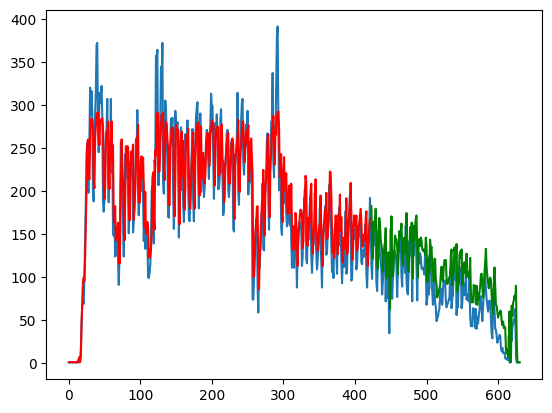

In [25]:
# plot
plt.plot(orders_bydate_lstm)
plt.plot(train_plot, c='r')
plt.plot(test_plot, c='g')
plt.show()

# RNN Pytorch

In [26]:
from torch.utils.data import DataLoader, Dataset
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

In [27]:
#Load data
orders_bydate_rnn = orders_bydate_filtered.copy()

In [28]:
orders_bydate_rnn.head(5)

,date,no_orders
633,2018-10-17,1
632,2018-10-16,1
631,2018-10-03,1
630,2018-10-01,1
629,2018-09-29,1


In [29]:
orders_bydate_rnn.set_index('date', inplace = True)

In [30]:
orders_bydate_rnn

,no_orders
date,
2018-10-17,1
2018-10-16,1
2018-10-03,1
2018-10-01,1
2018-09-29,1
...,...
2016-10-02,1
2016-09-15,1
2016-09-13,1


In [31]:
#Preprocessing
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(orders_bydate_rnn)

In [32]:
df_scaled

array([[0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.00512821],
       [0.00769231],
       [0.        ],
       [0.00769231],
       [0.03333333],
       [0.11025641],
       [0.16923077],
       [0.18461538],
       [0.17435897],
       [0.25128205],
       [0.36666667],
       [0.47692308],
       [0.62051282],
       [0.65384615],
       [0.52051282],
       [0.50512821],
       [0.65641026],
       [0.81794872],
       [0.73589744],
       [0.80769231],
       [0.74615385],
       [0.5025641 ],
       [0.47948718],
       [0.65384615],
       [0.73846154],
       [0.80769231],
       [0.94615385],
       [0.95128205],
       [0.70512821],
       [0.62564103],
       [0.8025641 ],
       [0.77179487],
       [0.79487179],
       [0.82307692],
       [0.735

In [33]:
#Create sequences and labels for training
seq_length = 24
X, y = [], []
for i in range(len(df_scaled) - seq_length):
    X.append(df_scaled[i:i + seq_length])
    y.append(df_scaled[i + seq_length])

X, y = np.array(X), np.array(y)

In [34]:
#Split the data into training and test sets
train_size = int(0.67 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [35]:
#Create a custom dataset class for Pytorch DataLoader
class RNNDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype = torch.float32)
        self.y = torch.tensor(y, dtype = torch.float32)

    def __len__(self):
        return len(self.X)
    
    def __getitem__(self, index):
        return self.X[index], self.y[index]

In [36]:
#Define the RNN model
class RNNModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNNModel, self).__init__()
        self.rnn = nn.LSTM(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out, _ = self.rnn(x)
        out = self.fc(out[:, -1, :])
        return out

In [37]:
#Hyperparameters
input_size = X_train.shape[2]
hidden_size = 128
output_size = 1
learning_rate = 0.001
num_epochs = 50
batch_size = 64

In [38]:
#Create Data Loaders
train_dataset = RNNDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

In [39]:
#Initialize the model, loss function, and optimizer
model = RNNModel(input_size, hidden_size, output_size)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [40]:
#Training the model
for epoch in range(num_epochs):
    for inputs, targets in train_loader:
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [10/50], Loss: 0.0201
Epoch [20/50], Loss: 0.0183
Epoch [30/50], Loss: 0.0197
Epoch [40/50], Loss: 0.0143
Epoch [50/50], Loss: 0.0140


In [41]:
#Evaluate the test set
model.eval()
with torch.no_grad():
    X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
    y_pred = model(X_test_tensor).numpy()
    y_pred = scaler.inverse_transform(y_pred)
    y_test = scaler.inverse_transform(y_test)

In [42]:
#Calculate RMSE
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.2f}")
mape = mean_absolute_percentage_error(y_test, y_pred) * 100
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

Root Mean Squared Error (RMSE): 40.53535617354694
Mean Absolute Error (MAE): 34.37
Mean Absolute Percentage Error (MAPE): 362.46%


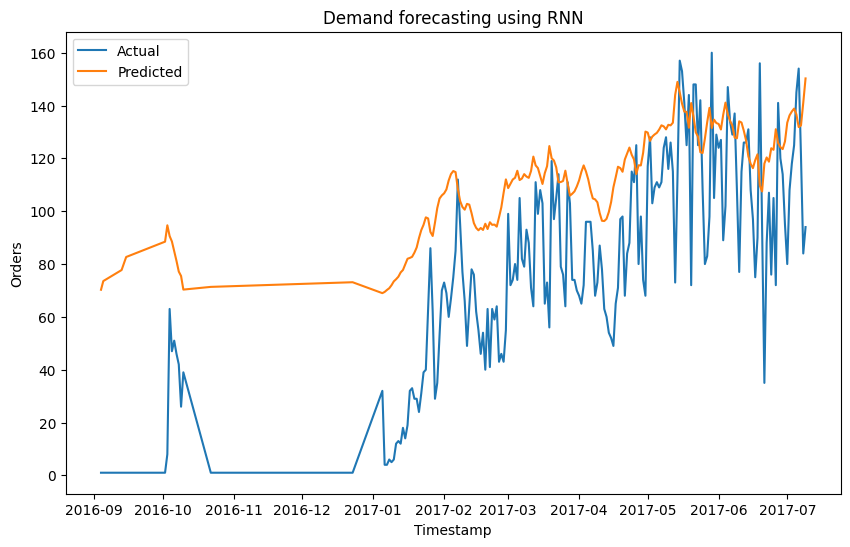

In [44]:
#Visualize predictions against actual data
plt.figure(figsize=(10, 6))
plt.plot(orders_bydate_rnn.index[train_size+seq_length:], y_test, label='Actual')
plt.plot(orders_bydate_rnn.index[train_size+seq_length:], y_pred, label='Predicted')
plt.xlabel('Timestamp')
plt.ylabel('Orders')
plt.title('Demand forecasting using RNN')
plt.legend()
plt.show()

References:
- https://github.com/SheezaShabbir/Time-series-Analysis-using-LSTM-RNN-and-GRU
